In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import confusion_matrix, classification_report

# Read second sheet from xls file into a dataframe
df = pd.read_excel('CTG.xls', sheet_name="Data", skiprows=[0] ,usecols="K:AE")
print(df.head)
# Since last three rows contain invalid data, we delete them, and we also delete empty columns with weird names
# (Unnamed: 9, 31, 42, 44)


df=df.dropna()
# Check for NaN values
print(df.isnull().values.any())
# Looking good! Save dataframe to CSV for future usage
#df.to_csv(path_or_buf='cardio.csv')

# Perform PCA to reduce data to two dimensions, after standardizing it
X = df.drop(['AC.1', 'FM.1'], axis=1).to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)
pca = PCA(n_components=2)
X = pca.fit_transform(X)
print('Dataset after scaling/applying PCA:', X)
print(df)
y_AC = [int(i - 1) for i in df['AC.1'].values.tolist()]
y_FM = [int(i - 1) for i in df['FM.1'].values.tolist()]

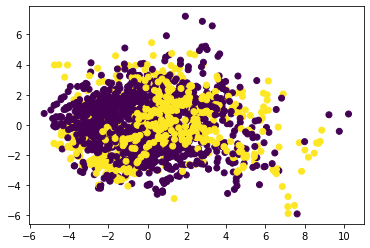

In [3]:
plt.scatter(X[:,0], X[:,1] , c=y_FM)

predictions:  [0 1 1 ... 0 0 0]


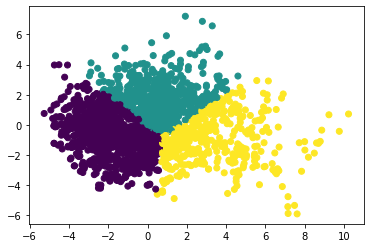

In [4]:

#plt.scatter(X[:,0], X[:,1])
kmeans = KMeans(n_clusters=3) # define the model
kmeans = kmeans.fit(X) # fit the model
labels = kmeans.labels_
print("predictions: ", labels)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()

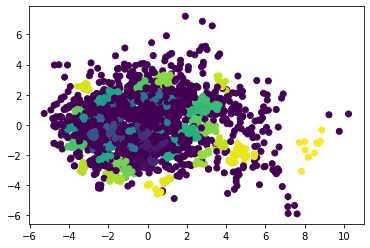

In [5]:
from sklearn.cluster import OPTICS
optics= OPTICS(min_samples=8)
optics =optics.fit(X)
labels=optics.labels_
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


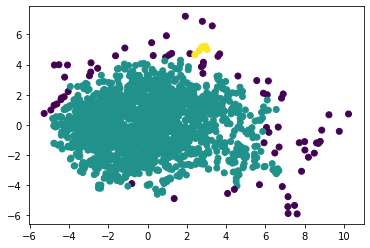

In [6]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan=dbscan.fit(X)
labels=dbscan.labels_
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()

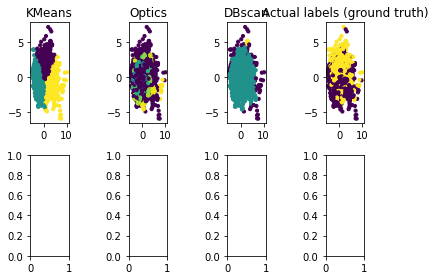

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=4)
ax[0, 0].title.set_text('KMeans')
ax[0, 1].title.set_text('Optics')
ax[0, 2].title.set_text('DBscan')
ax[0, 3].title.set_text('Actual labels (ground truth)')
ax[0, 0].scatter(X[:, 0], X[:, 1], c=kmeans.fit_predict(X), s=10)
ax[0, 1].scatter(X[:, 0], X[:, 1], c=optics.fit_predict(X), s=10)
ax[0, 2].scatter(X[:, 0], X[:, 1], c=dbscan.fit_predict(X), s=10)
ax[0, 3].scatter(X[:, 0], X[:, 1], c=y_AC, s=10)
plt.tight_layout()
plt.show()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


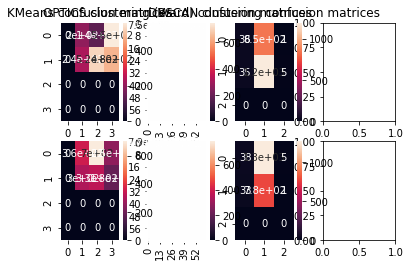

In [13]:
# And also visualize the confusion matrices
kmeans_AC_cm = confusion_matrix(y_AC, kmeans.fit_predict(X))
kmeans_FM_cm = confusion_matrix(y_FM, kmeans.fit_predict(X))
optics_AC_cm = confusion_matrix(y_AC, optics.fit_predict(X))
optics_FM_cm = confusion_matrix(y_FM, optics.fit_predict(X))
dbscan_AC_cm = confusion_matrix(y_AC, dbscan.fit_predict(X))
dbscan_FM_cm = confusion_matrix(y_FM, dbscan.fit_predict(X))
fig, ax = plt.subplots(nrows=2, ncols=4)
ax[0, 0].title.set_text('KMeans confusion matrices')
ax[0, 1].title.set_text('OPTICS clustering (Ward) confusion matrices')
ax[0, 2].title.set_text('DBSCAN clustering confusion matrices')
sns.heatmap(kmeans_AC_cm, annot=True, ax=ax[0, 0])
sns.heatmap(optics_AC_cm, annot=True, ax=ax[0, 1])
sns.heatmap(dbscan_AC_cm, annot=True, ax=ax[0, 2])
sns.heatmap(kmeans_FM_cm, annot=True, ax=ax[1, 0])
sns.heatmap(optics_FM_cm, annot=True, ax=ax[1, 1])
sns.heatmap(dbscan_FM_cm, annot=True, ax=ax[1, 2])
plt.tight_layout()
plt.show()